# 외향적인 사람과 내향적인 사람 예측

In [117]:
import pandas as pd

In [118]:
person_test_df = pd.read_csv('test (1).csv')
person_train_df = pd.read_csv('train (1).csv')

In [119]:
person_train_df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.00,No,6.00,4.00,No,15.00,5.00,Extrovert
1,1,1.00,No,7.00,3.00,No,10.00,8.00,Extrovert
2,2,6.00,Yes,1.00,0.00,NaN,3.00,0.00,Introvert
3,3,3.00,No,7.00,3.00,No,11.00,5.00,Extrovert
4,4,1.00,No,4.00,4.00,No,13.00,NaN,Extrovert


### 컬럼명 설명
- Time_spent_Alone : 혼자 보내는 시간
- Stage_fear	: 무대 공포증
- Social_event_attendance : 사회적 이벤트 참여
- Going_outside	 : 밖에 나가는 정도
- Drained_after_socializing : 밖에 나간후 피로감을 느끼는 정도
- Friends_circle_size : 친구 관계 규모
- Post_frequency : 온라인에 글 업로드 빈도
- Personality : 외향적/내향적(정답 레이블)

In [120]:
person_train_df.describe()

,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,18524.00,17334.00,17344.00,17058.00,17470.00,17260.00
mean,9261.50,3.14,5.27,4.04,8.00,4.98
std,5347.56,3.00,2.75,2.06,4.22,2.88
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,4630.75,1.00,3.00,3.00,5.00,3.00
50%,9261.50,2.00,5.00,4.00,8.00,5.00
75%,13892.25,4.00,8.00,6.00,12.00,7.00
max,18523.00,11.00,10.00,7.00,15.00,10.00


In [121]:
person_train_df.shape

(18524, 9)

### 데이터 전처리


In [122]:
person_train_df.isna().sum()

,0
id,0
Time_spent_Alone,1190
Stage_fear,1893
Social_event_attendance,1180
Going_outside,1466
Drained_after_socializing,1149
Friends_circle_size,1054
Post_frequency,1264
Personality,0


In [123]:
# 결측값 평균치로 채우기
fill_null = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
person_train_df[fill_null] = person_train_df[fill_null].fillna(person_train_df[fill_null].mean())

In [124]:
# 결측값 처리 확인
person_train_df.isna().sum()

,0
id,0
Time_spent_Alone,0
Stage_fear,1893
Social_event_attendance,0
Going_outside,0
Drained_after_socializing,1149
Friends_circle_size,0
Post_frequency,0
Personality,0


In [125]:
cat = ['Stage_fear','Drained_after_socializing']

In [126]:
cat_train_df = person_train_df.dropna()

In [127]:
cat_train_df.isna().sum()

,0
id,0
Time_spent_Alone,0
Stage_fear,0
Social_event_attendance,0
Going_outside,0
Drained_after_socializing,0
Friends_circle_size,0
Post_frequency,0
Personality,0


In [128]:
stage_fear_map = {
    'Yes' : 0,
    'No' : 1
}

In [129]:
drained_map = {
    'Yes' : 0,
    'No' : 1
}

In [130]:
# 범주형 데이터 매핑
from sklearn.feature_selection import f_classif

cat_train_df['Stage_fear'] = cat_train_df['Stage_fear'].map(stage_fear_map)
cat_train_df['Drained_after_socializing'] = cat_train_df['Drained_after_socializing'].map(drained_map)

In [131]:
cat_train_df.isna().sum()

,0
id,0
Time_spent_Alone,0
Stage_fear,0
Social_event_attendance,0
Going_outside,0
Drained_after_socializing,0
Friends_circle_size,0
Post_frequency,0
Personality,0


In [132]:
cat_train_df.dtypes

,0
id,int64
Time_spent_Alone,float64
Stage_fear,int64
Social_event_attendance,float64
Going_outside,float64
Drained_after_socializing,int64
Friends_circle_size,float64
Post_frequency,float64
Personality,object


In [133]:
cat_train_df = cat_train_df.drop(columns='Personality')

In [134]:
per_train_df = person_train_df.drop(columns=['Personality','Drained_after_socializing','Stage_fear'])

In [135]:
per_train_df.dtypes

,0
id,int64
Time_spent_Alone,float64
Social_event_attendance,float64
Going_outside,float64
Friends_circle_size,float64
Post_frequency,float64


In [136]:
col = ['id','Time_spent_Alone','Social_event_attendance','Going_outside','Friends_circle_size','Post_frequency']
per_train_df[col] = per_train_df[col].apply(pd.to_numeric,errors = 'coerce')
cat_train_df[col] = cat_train_df[col].apply(pd.to_numeric,errors = 'coerce')

In [137]:
per_train_df = person_train_df.drop(columns=['Personality','Drained_after_socializing','Stage_fear'])

In [138]:
per_train_df = pd.DataFrame(per_train_df)
cat_train_df = pd.DataFrame(cat_train_df)

In [139]:
per_train_df[fill_null].dropna().shape

(18524, 5)

### 범주형 컬럼 f-검정
- 가장 유사도가 높은 컬럼 채택

In [140]:
# Stage_fear 컬럼 f-검정
X = per_train_df[fill_null]
y = cat_train_df['Stage_fear']

common_idx = X.index.intersection(y.index)
X = X.loc[common_idx]
y = y.loc[common_idx]
f_vals,p_vals = f_classif(X,y)

pd.DataFrame({'feature' : fill_null, 'F_score' : f_vals, 'p_value': p_vals})

,feature,F_score,p_value
0,Time_spent_Alone,25588.85,0.00
1,Social_event_attendance,14029.29,0.00
2,Going_outside,14206.99,0.00
3,Friends_circle_size,11164.54,0.00
4,Post_frequency,11572.80,0.00


In [141]:
# Drained_after_socializing 컬럼 f-검정
X1 = per_train_df[fill_null]
y1 = cat_train_df['Drained_after_socializing']

common_idx1 = X1.index.intersection(y1.index)
X1 = X1.loc[common_idx1]
y1 = y1.loc[common_idx1]
f_vals1,p_vals1 = f_classif(X1,y1)

pd.DataFrame({'feature' : fill_null, 'F_score' : f_vals1, 'p_value': p_vals1})

,feature,F_score,p_value
0,Time_spent_Alone,25699.99,0.00
1,Social_event_attendance,14036.33,0.00
2,Going_outside,14297.11,0.00
3,Friends_circle_size,11129.65,0.00
4,Post_frequency,11637.99,0.00


In [142]:
cat_train_df['Stage_fear'].unique()

array([1, 0])

In [143]:
person_train_df.isna().sum()

,0
id,0
Time_spent_Alone,0
Stage_fear,1893
Social_event_attendance,0
Going_outside,0
Drained_after_socializing,1149
Friends_circle_size,0
Post_frequency,0
Personality,0


In [144]:
person_train_df['Stage_fear'] = person_train_df['Stage_fear'].map({
    'Yes' : 0,
    'No' : 1
})


In [145]:
person_train_df['Drained_after_socializing'] = person_train_df['Drained_after_socializing'].map({
    'Yes' : 0,
    'No' : 1
})

In [146]:
# 유사도가 높은 컬럼의 값에 따라 범주형 컬럼의 결측값 변경
threshhold = person_train_df['Time_spent_Alone'].mean()

person_train_df_filled = person_train_df.copy()

for idx in person_train_df.index:
    if pd.isna(person_train_df.loc[idx,'Stage_fear']):
        if person_train_df.loc[idx, 'Time_spent_Alone'] >= threshhold:
            person_train_df.loc[idx, 'Stage_fear'] = 0
        else:
            person_train_df.loc[idx, 'Stage_fear'] = 1

    if pd.isna(person_train_df.loc[idx,'Drained_after_socializing']):
          if person_train_df.loc[idx, 'Time_spent_Alone'] >= threshhold:
              person_train_df.loc[idx,'Drained_after_socializing'] = 0
          else:
            person_train_df.loc[idx, 'Drained_after_socializing'] = 1

In [147]:
person_train_df

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.00,1.00,6.00,4.00,1.00,15.00,5.00,Extrovert
1,1,1.00,1.00,7.00,3.00,1.00,10.00,8.00,Extrovert
2,2,6.00,0.00,1.00,0.00,0.00,3.00,0.00,Introvert
3,3,3.00,1.00,7.00,3.00,1.00,11.00,5.00,Extrovert
4,4,1.00,1.00,4.00,4.00,1.00,13.00,4.98,Extrovert
...,...,...,...,...,...,...,...,...,...
18519,18519,3.00,1.00,7.00,3.00,1.00,9.00,7.00,Extrovert
18520,18520,1.00,1.00,6.00,7.00,1.00,6.00,5.00,Extrovert
18521,18521,7.00,0.00,1.00,1.00,0.00,1.00,4.98,Introvert
18522,18522,3.14,0.00,1.00,0.00,0.00,5.00,2.00,Introvert


In [148]:
person_train_df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.00,1.00,6.00,4.00,1.00,15.00,5.00,Extrovert
1,1,1.00,1.00,7.00,3.00,1.00,10.00,8.00,Extrovert
2,2,6.00,0.00,1.00,0.00,0.00,3.00,0.00,Introvert
3,3,3.00,1.00,7.00,3.00,1.00,11.00,5.00,Extrovert
4,4,1.00,1.00,4.00,4.00,1.00,13.00,4.98,Extrovert


In [149]:
person_train_df['Personality'] = person_train_df['Personality'].map({
    'Extrovert' : 0,
    'Introvert' : 1
})

In [150]:
X = person_train_df.drop(columns=['id','Personality'])
y = person_train_df['Personality']

In [151]:
X.shape, y.shape

((18524, 7), (18524,))

### 훈련 데이터, 테스트 데이터 분할

In [152]:
X

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,0.00,1.00,6.00,4.00,1.00,15.00,5.00
1,1.00,1.00,7.00,3.00,1.00,10.00,8.00
2,6.00,0.00,1.00,0.00,0.00,3.00,0.00
3,3.00,1.00,7.00,3.00,1.00,11.00,5.00
4,1.00,1.00,4.00,4.00,1.00,13.00,4.98
...,...,...,...,...,...,...,...
18519,3.00,1.00,7.00,3.00,1.00,9.00,7.00
18520,1.00,1.00,6.00,7.00,1.00,6.00,5.00
18521,7.00,0.00,1.00,1.00,0.00,1.00,4.98
18522,3.14,0.00,1.00,0.00,0.00,5.00,2.00


In [153]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)


In [154]:
!pip install lazypredict

### lazypredict 사용해 상위 2개 알고리즘 선정

In [155]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0)
models, predictions = clf.fit(X_train, X_val, y_train, y_val)

print(models)

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 3836, number of negative: 10983
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000965 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 74
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258857 -> initscore=-1.051918
[LightGBM] [Info] Start training from score -1.051918
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LogisticRegression                 0.97               0.96     0.96      0.97   
NuSVC                              0.97               0.96     0.96      0.97   
SVC                                0.97               0.96     0.96      0.97   
LGBMClassifier                     0.97  

In [156]:
X.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,0.00,1.00,6.00,4.00,1.00,15.00,5.00
1,1.00,1.00,7.00,3.00,1.00,10.00,8.00
2,6.00,0.00,1.00,0.00,0.00,3.00,0.00
3,3.00,1.00,7.00,3.00,1.00,11.00,5.00
4,1.00,1.00,4.00,4.00,1.00,13.00,4.98


In [157]:
X_train

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
8232,0.00,1.00,10.00,6.00,1.00,15.00,7.00
1115,4.00,1.00,4.00,7.00,1.00,8.00,7.00
83,9.00,0.00,5.27,3.00,0.00,4.00,0.00
12728,8.00,0.00,1.00,1.00,0.00,5.00,1.00
1970,0.00,1.00,6.00,4.00,1.00,11.00,8.00
...,...,...,...,...,...,...,...
10984,0.00,1.00,5.00,5.00,1.00,5.00,5.00
10658,6.00,0.00,3.00,4.04,0.00,2.00,1.00
17463,1.00,1.00,5.00,6.00,1.00,4.00,4.00
18157,0.00,1.00,9.00,4.00,1.00,7.00,7.00


In [158]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score

model = Perceptron(max_iter=1000, eta0=1.0,random_state=2020158011)
scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"cross_validated accuracy : {scores}")

cross_validated accuracy : [0.96626181 0.9682861  0.96052632 0.96862348 0.95882551]


accuracy : 0.2817813765182186
              precision    recall  f1-score   support

           0       1.00      0.02      0.04      2716
           1       0.27      1.00      0.43       989

    accuracy                           0.28      3705
   macro avg       0.64      0.51      0.23      3705
weighted avg       0.81      0.28      0.14      3705



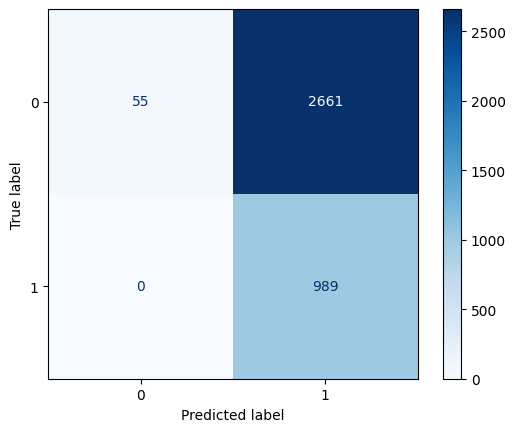

In [159]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

lgb = LGBMClassifier(random_state=2020158011)
model.fit(X_train,y_train)
preds = model.predict(X_val)

print(f"accuracy : {accuracy_score(y_val,preds)}")
print(classification_report(y_val,preds))

cm = confusion_matrix(y_val, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

In [160]:
!pip install optuna

### LGBM 알고리즘 optuna 사용해 하이퍼 파라미터 조정

In [161]:
import optuna
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
# Optuna 목적 함수 정의
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'num_leaves': trial.suggest_int('num_leaves', 15, 150),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
        'random_state': 2020158011
    }
    model = LGBMClassifier(**params)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    loss = log_loss(y_val,preds)
    return loss
    #return f1_score(y_val,preds)
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)
print('Best trial:', study.best_params)

[I 2025-07-16 03:35:17,829] A new study created in memory with name: no-name-e7c10112-b30f-435d-b908-3306c0148ee2


[LightGBM] [Info] Number of positive: 3836, number of negative: 10983
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002652 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258857 -> initscore=-1.051918
[LightGBM] [Info] Start training from score -1.051918
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-07-16 03:35:18,179] Trial 0 finished with value: 1.167405777785171 and parameters: {'n_estimators': 69, 'learning_rate': 0.2782665987436712, 'max_depth': 9, 'num_leaves': 141, 'min_child_samples': 90, 'subsample': 0.8634929769291126, 'colsample_bytree': 0.6815765022218478, 'reg_alpha': 0.07187778268782763, 'reg_lambda': 0.9657968555219708}. Best is trial 0 with value: 1.167405777785171.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3836, number of negative: 10983
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002579 seconds.
Y

[I 2025-07-16 03:35:19,365] Trial 1 finished with value: 1.1479490148220848 and parameters: {'n_estimators': 384, 'learning_rate': 0.014187535997259748, 'max_depth': 12, 'num_leaves': 69, 'min_child_samples': 72, 'subsample': 0.9251875120341946, 'colsample_bytree': 0.6582490803637682, 'reg_alpha': 0.3918248031659881, 'reg_lambda': 0.011420975087977903}. Best is trial 1 with value: 1.1479490148220848.


[LightGBM] [Info] Number of positive: 3836, number of negative: 10983
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001513 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258857 -> initscore=-1.051918
[LightGBM] [Info] Start training from score -1.051918
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-07-16 03:35:20,575] Trial 2 finished with value: 1.1868625407482574 and parameters: {'n_estimators': 467, 'learning_rate': 0.2499845922276652, 'max_depth': 12, 'num_leaves': 63, 'min_child_samples': 17, 'subsample': 0.8023105408663764, 'colsample_bytree': 0.5435552014585697, 'reg_alpha': 0.7312332585476418, 'reg_lambda': 0.5589164913126056}. Best is trial 1 with value: 1.1479490148220848.


[LightGBM] [Info] Number of positive: 3836, number of negative: 10983
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003477 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258857 -> initscore=-1.051918
[LightGBM] [Info] Start training from score -1.051918
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-07-16 03:35:21,201] Trial 3 finished with value: 1.1965909222298003 and parameters: {'n_estimators': 160, 'learning_rate': 0.2766797537237373, 'max_depth': 11, 'num_leaves': 28, 'min_child_samples': 91, 'subsample': 0.834530684342879, 'colsample_bytree': 0.6451420733682341, 'reg_alpha': 0.11441816304083241, 'reg_lambda': 0.1686754206521025}. Best is trial 1 with value: 1.1479490148220848.


[LightGBM] [Info] Number of positive: 3836, number of negative: 10983
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002669 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258857 -> initscore=-1.051918
[LightGBM] [Info] Start training from score -1.051918
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-07-16 03:35:21,638] Trial 4 finished with value: 1.1771341592667144 and parameters: {'n_estimators': 91, 'learning_rate': 0.04042839788714625, 'max_depth': 10, 'num_leaves': 109, 'min_child_samples': 99, 'subsample': 0.9552803207364662, 'colsample_bytree': 0.8408653394390506, 'reg_alpha': 0.001960303299975652, 'reg_lambda': 0.8442354727165516}. Best is trial 1 with value: 1.1479490148220848.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-16 03:35:22,565] Trial 5 finished with value: 1.1479490148220848 and parameters: {'n_estimators': 195, 'learning_rate': 0.20353215127621738, 'max_depth': 6, 'num_leaves': 19, 'min_child_samples': 71, 'subsample': 0.8939689495701766, 'colsample_bytree': 0.5095850663801957, 'reg_alpha': 0.7487908487509543, 'reg_lambda': 0.29651920858303116}. Best is trial 1 with value: 1.1479490148220848.


[LightGBM] [Info] Number of positive: 3836, number of negative: 10983
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001372 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258857 -> initscore=-1.051918
[LightGBM] [Info] Start training from score -1.051918
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[I 2025-07-16 03:35:23,116] Trial 6 finished with value: 1.177134159266714 and parameters: {'n_estimators': 83, 'learning_rate': 0.19720117149117763, 'max_depth': 9, 'num_leaves': 65, 'min_child_samples': 80, 'subsample': 0.7577610632079947, 'colsample_bytree': 0.9827083200434348, 'reg_alpha': 0.15786112727316526, 'reg_lambda': 0.7173834259516634}. Best is trial 1 with value: 1.1479490148220848.


[LightGBM] [Info] Number of positive: 3836, number of negative: 10983
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002399 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258857 -> initscore=-1.051918
[LightGBM] [Info] Start training from score -1.051918
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-07-16 03:35:29,237] Trial 7 finished with value: 1.391158551860662 and parameters: {'n_estimators': 479, 'learning_rate': 0.08476261793004695, 'max_depth': 15, 'num_leaves': 124, 'min_child_samples': 54, 'subsample': 0.8839952232088675, 'colsample_bytree': 0.7652578644192223, 'reg_alpha': 0.1360506818912639, 'reg_lambda': 0.5644368717696469}. Best is trial 1 with value: 1.1479490148220848.


[LightGBM] [Info] Number of positive: 3836, number of negative: 10983
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003244 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258857 -> initscore=-1.051918
[LightGBM] [Info] Start training from score -1.051918
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-07-16 03:35:30,228] Trial 8 finished with value: 1.2744179740821449 and parameters: {'n_estimators': 158, 'learning_rate': 0.28699067972333586, 'max_depth': 11, 'num_leaves': 107, 'min_child_samples': 68, 'subsample': 0.7233807888390805, 'colsample_bytree': 0.9731040894750176, 'reg_alpha': 0.3993084463461387, 'reg_lambda': 0.9515479891935282}. Best is trial 1 with value: 1.1479490148220848.


[LightGBM] [Info] Number of positive: 3836, number of negative: 10983
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002442 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258857 -> initscore=-1.051918
[LightGBM] [Info] Start training from score -1.051918
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-07-16 03:35:32,359] Trial 9 finished with value: 1.3327882629714034 and parameters: {'n_estimators': 351, 'learning_rate': 0.19236762069742944, 'max_depth': 10, 'num_leaves': 133, 'min_child_samples': 95, 'subsample': 0.7023978799944905, 'colsample_bytree': 0.8733920538479616, 'reg_alpha': 0.15120351647731278, 'reg_lambda': 0.8153119142340964}. Best is trial 1 with value: 1.1479490148220848.


[LightGBM] [Info] Number of positive: 3836, number of negative: 10983
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002472 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258857 -> initscore=-1.051918
[LightGBM] [Info] Start training from score -1.051918
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-07-16 03:35:33,305] Trial 10 finished with value: 1.1382206333405416 and parameters: {'n_estimators': 356, 'learning_rate': 0.12866185891831788, 'max_depth': 3, 'num_leaves': 79, 'min_child_samples': 24, 'subsample': 0.5351518988095436, 'colsample_bytree': 0.6236720018174581, 'reg_alpha': 0.4867888793884819, 'reg_lambda': 0.025644272433746673}. Best is trial 10 with value: 1.1382206333405416.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-16 03:35:34,631] Trial 11 finished with value: 1.1382206333405416 and parameters: {'n_estimators': 351, 'learning_rate': 0.11373844632759363, 'max_depth': 3, 'num_leaves': 82, 'min_child_samples': 19, 'subsample': 0.5237036315807668, 'colsample_bytree': 0.6195217753491679, 'reg_alpha': 0.46634207078912426, 'reg_lambda': 0.022350535606948215}. Best is trial 10 with value: 1.1382206333405416.


[LightGBM] [Info] Number of positive: 3836, number of negative: 10983
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002456 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258857 -> initscore=-1.051918
[LightGBM] [Info] Start training from score -1.051918
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-07-16 03:35:35,294] Trial 12 finished with value: 1.1479490148220848 and parameters: {'n_estimators': 292, 'learning_rate': 0.11851834851436652, 'max_depth': 3, 'num_leaves': 90, 'min_child_samples': 15, 'subsample': 0.5111160875389352, 'colsample_bytree': 0.592408143052026, 'reg_alpha': 0.5682817446540478, 'reg_lambda': 0.034872163590474514}. Best is trial 10 with value: 1.1382206333405416.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-16 03:35:36,524] Trial 13 finished with value: 1.1479490148220846 and parameters: {'n_estimators': 398, 'learning_rate': 0.12940814831125919, 'max_depth': 3, 'num_leaves': 38, 'min_child_samples': 32, 'subsample': 0.5063006528635301, 'colsample_bytree': 0.7609171316526377, 'reg_alpha': 0.9679721202381789, 'reg_lambda': 0.31782369412385736}. Best is trial 10 with value: 1.1382206333405416.


[LightGBM] [Info] Number of positive: 3836, number of negative: 10983
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258857 -> initscore=-1.051918
[LightGBM] [Info] Start training from score -1.051918
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[I 2025-07-16 03:35:39,231] Trial 14 finished with value: 1.1479490148220848 and parameters: {'n_estimators': 278, 'learning_rate': 0.08273213794656054, 'max_depth': 5, 'num_leaves': 88, 'min_child_samples': 35, 'subsample': 0.6006423140582443, 'colsample_bytree': 0.5908328854232155, 'reg_alpha': 0.5559106869553416, 'reg_lambda': 0.18069685919119555}. Best is trial 10 with value: 1.1382206333405416.


[LightGBM] [Info] Number of positive: 3836, number of negative: 10983
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005781 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258857 -> initscore=-1.051918
[LightGBM] [Info] Start training from score -1.051918
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-07-16 03:35:41,489] Trial 15 finished with value: 1.2160476851928865 and parameters: {'n_estimators': 330, 'learning_rate': 0.16060062229399757, 'max_depth': 6, 'num_leaves': 48, 'min_child_samples': 5, 'subsample': 0.619467251786142, 'colsample_bytree': 0.7145662803344056, 'reg_alpha': 0.33026582766092016, 'reg_lambda': 0.3963017449803814}. Best is trial 10 with value: 1.1382206333405416.


[LightGBM] [Info] Number of positive: 3836, number of negative: 10983
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003925 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258857 -> initscore=-1.051918
[LightGBM] [Info] Start training from score -1.051918
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-07-16 03:35:42,433] Trial 16 finished with value: 1.157677396303628 and parameters: {'n_estimators': 223, 'learning_rate': 0.08317731579979111, 'max_depth': 5, 'num_leaves': 106, 'min_child_samples': 36, 'subsample': 0.5874407651383496, 'colsample_bytree': 0.6015083482922755, 'reg_alpha': 0.66668646147006, 'reg_lambda': 0.15051230655343795}. Best is trial 10 with value: 1.1382206333405416.


[LightGBM] [Info] Number of positive: 3836, number of negative: 10983
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002493 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258857 -> initscore=-1.051918
[LightGBM] [Info] Start training from score -1.051918
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-07-16 03:35:44,985] Trial 17 finished with value: 1.2841463555636883 and parameters: {'n_estimators': 420, 'learning_rate': 0.15014381041443275, 'max_depth': 7, 'num_leaves': 78, 'min_child_samples': 48, 'subsample': 0.6569054720508076, 'colsample_bytree': 0.5033500785224762, 'reg_alpha': 0.30010532994485534, 'reg_lambda': 0.12064274968866368}. Best is trial 10 with value: 1.1382206333405416.


[LightGBM] [Info] Number of positive: 3836, number of negative: 10983
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258857 -> initscore=-1.051918
[LightGBM] [Info] Start training from score -1.051918
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-07-16 03:35:47,205] Trial 18 finished with value: 1.1382206333405416 and parameters: {'n_estimators': 438, 'learning_rate': 0.055141379570414636, 'max_depth': 3, 'num_leaves': 48, 'min_child_samples': 19, 'subsample': 0.5538500002922471, 'colsample_bytree': 0.7210512841730423, 'reg_alpha': 0.918995064082555, 'reg_lambda': 0.43243088613687425}. Best is trial 10 with value: 1.1382206333405416.


[LightGBM] [Info] Number of positive: 3836, number of negative: 10983
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009671 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258857 -> initscore=-1.051918
[LightGBM] [Info] Start training from score -1.051918
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-07-16 03:35:48,858] Trial 19 finished with value: 1.1382206333405418 and parameters: {'n_estimators': 331, 'learning_rate': 0.10902874407747593, 'max_depth': 4, 'num_leaves': 97, 'min_child_samples': 26, 'subsample': 0.6596264081518212, 'colsample_bytree': 0.8390927209507268, 'reg_alpha': 0.5263547922425268, 'reg_lambda': 0.2723493600749457}. Best is trial 10 with value: 1.1382206333405416.


[LightGBM] [Info] Number of positive: 3836, number of negative: 10983
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002477 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258857 -> initscore=-1.051918
[LightGBM] [Info] Start training from score -1.051918
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-07-16 03:35:50,834] Trial 20 finished with value: 1.2841463555636883 and parameters: {'n_estimators': 366, 'learning_rate': 0.1702079937236155, 'max_depth': 7, 'num_leaves': 78, 'min_child_samples': 5, 'subsample': 0.5473913180579518, 'colsample_bytree': 0.6163985148524246, 'reg_alpha': 0.25419411424662985, 'reg_lambda': 0.055188530207824604}. Best is trial 10 with value: 1.1382206333405416.


[LightGBM] [Info] Number of positive: 3836, number of negative: 10983
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005538 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258857 -> initscore=-1.051918
[LightGBM] [Info] Start training from score -1.051918
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-07-16 03:35:52,834] Trial 21 finished with value: 1.1382206333405416 and parameters: {'n_estimators': 437, 'learning_rate': 0.05265119600322796, 'max_depth': 3, 'num_leaves': 46, 'min_child_samples': 20, 'subsample': 0.5567712577981043, 'colsample_bytree': 0.7097282822267074, 'reg_alpha': 0.9690877682121309, 'reg_lambda': 0.43023176635398114}. Best is trial 10 with value: 1.1382206333405416.


[LightGBM] [Info] Number of positive: 3836, number of negative: 10983
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002461 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258857 -> initscore=-1.051918
[LightGBM] [Info] Start training from score -1.051918
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-07-16 03:35:54,653] Trial 22 finished with value: 1.1382206333405416 and parameters: {'n_estimators': 434, 'learning_rate': 0.0586431834010266, 'max_depth': 4, 'num_leaves': 48, 'min_child_samples': 45, 'subsample': 0.5563898181830236, 'colsample_bytree': 0.7250204429804847, 'reg_alpha': 0.8518714033038554, 'reg_lambda': 0.6680497244128709}. Best is trial 10 with value: 1.1382206333405416.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number 

[I 2025-07-16 03:35:55,808] Trial 23 finished with value: 1.167405777785171 and parameters: {'n_estimators': 497, 'learning_rate': 0.0977815804092769, 'max_depth': 4, 'num_leaves': 55, 'min_child_samples': 25, 'subsample': 0.505170868380495, 'colsample_bytree': 0.5546272727464221, 'reg_alpha': 0.42362811701992414, 'reg_lambda': 0.2314704662176395}. Best is trial 10 with value: 1.1382206333405416.


[LightGBM] [Info] Number of positive: 3836, number of negative: 10983
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001590 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258857 -> initscore=-1.051918
[LightGBM] [Info] Start training from score -1.051918
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-07-16 03:35:56,406] Trial 24 finished with value: 1.1479490148220846 and parameters: {'n_estimators': 302, 'learning_rate': 0.012103176897358639, 'max_depth': 5, 'num_leaves': 78, 'min_child_samples': 13, 'subsample': 0.645951742412733, 'colsample_bytree': 0.7972804923094021, 'reg_alpha': 0.642679571458731, 'reg_lambda': 0.08801411138735953}. Best is trial 10 with value: 1.1382206333405416.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-16 03:35:57,038] Trial 25 finished with value: 1.1868625407482574 and parameters: {'n_estimators': 246, 'learning_rate': 0.1352191301550031, 'max_depth': 7, 'num_leaves': 36, 'min_child_samples': 57, 'subsample': 0.5694390626080519, 'colsample_bytree': 0.6648864357935407, 'reg_alpha': 0.44776849709696076, 'reg_lambda': 0.38270548840473395}. Best is trial 10 with value: 1.1382206333405416.


[LightGBM] [Info] Number of positive: 3836, number of negative: 10983
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001470 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258857 -> initscore=-1.051918
[LightGBM] [Info] Start training from score -1.051918
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-07-16 03:35:57,646] Trial 26 finished with value: 1.1382206333405416 and parameters: {'n_estimators': 386, 'learning_rate': 0.06659785769317676, 'max_depth': 3, 'num_leaves': 96, 'min_child_samples': 42, 'subsample': 0.5353997311749762, 'colsample_bytree': 0.6258538691266029, 'reg_alpha': 0.8142074917294884, 'reg_lambda': 0.49750944545922304}. Best is trial 10 with value: 1.1382206333405416.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3836, number of negative: 10983
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001540 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258857 -> initscore=-1.051918
[LightGBM] [Info] Start training from score -1.051918
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-07-16 03:35:58,237] Trial 27 finished with value: 1.1382206333405416 and parameters: {'n_estimators': 327, 'learning_rate': 0.03760805468711033, 'max_depth': 4, 'num_leaves': 57, 'min_child_samples': 24, 'subsample': 0.6212070140393924, 'colsample_bytree': 0.562428029466316, 'reg_alpha': 0.6137261597304902, 'reg_lambda': 0.22483301072063894}. Best is trial 10 with value: 1.1382206333405416.


[LightGBM] [Info] Number of positive: 3836, number of negative: 10983
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001712 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258857 -> initscore=-1.051918
[LightGBM] [Info] Start training from score -1.051918
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-07-16 03:35:58,976] Trial 28 finished with value: 1.2355044481559727 and parameters: {'n_estimators': 406, 'learning_rate': 0.23057359190902382, 'max_depth': 15, 'num_leaves': 121, 'min_child_samples': 30, 'subsample': 0.6899582369687827, 'colsample_bytree': 0.693279557442415, 'reg_alpha': 0.4892704320961171, 'reg_lambda': 0.09972282792012727}. Best is trial 10 with value: 1.1382206333405416.


[LightGBM] [Info] Number of positive: 3836, number of negative: 10983
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001568 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258857 -> initscore=-1.051918
[LightGBM] [Info] Start training from score -1.051918
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-07-16 03:35:59,728] Trial 29 finished with value: 1.1965909222298003 and parameters: {'n_estimators': 442, 'learning_rate': 0.14329422501331074, 'max_depth': 6, 'num_leaves': 71, 'min_child_samples': 8, 'subsample': 0.5932685550391342, 'colsample_bytree': 0.6796292216330786, 'reg_alpha': 0.8887665443398942, 'reg_lambda': 0.654411349311655}. Best is trial 10 with value: 1.1382206333405416.


[LightGBM] [Info] Number of positive: 3836, number of negative: 10983
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001613 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258857 -> initscore=-1.051918
[LightGBM] [Info] Start training from score -1.051918
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-07-16 03:36:00,331] Trial 30 finished with value: 1.1868625407482574 and parameters: {'n_estimators': 362, 'learning_rate': 0.1748982694434597, 'max_depth': 8, 'num_leaves': 15, 'min_child_samples': 38, 'subsample': 0.5326652757148368, 'colsample_bytree': 0.9236859930646728, 'reg_alpha': 0.24974138690250436, 'reg_lambda': 0.34163859669344876}. Best is trial 10 with value: 1.1382206333405416.


[LightGBM] [Info] Number of positive: 3836, number of negative: 10983
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001761 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258857 -> initscore=-1.051918
[LightGBM] [Info] Start training from score -1.051918
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-07-16 03:36:00,998] Trial 31 finished with value: 1.1479490148220846 and parameters: {'n_estimators': 456, 'learning_rate': 0.05332163348898159, 'max_depth': 3, 'num_leaves': 48, 'min_child_samples': 19, 'subsample': 0.5776284191404035, 'colsample_bytree': 0.7033025667713985, 'reg_alpha': 0.9830322311979471, 'reg_lambda': 0.46565934221010175}. Best is trial 10 with value: 1.1382206333405416.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-16 03:36:01,633] Trial 32 finished with value: 1.1382206333405416 and parameters: {'n_estimators': 419, 'learning_rate': 0.03689073342882268, 'max_depth': 3, 'num_leaves': 38, 'min_child_samples': 19, 'subsample': 0.5441996812303349, 'colsample_bytree': 0.7331443473315277, 'reg_alpha': 0.9128919531139783, 'reg_lambda': 0.4398511190934725}. Best is trial 10 with value: 1.1382206333405416.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-16 03:36:02,238] Trial 33 finished with value: 1.1479490148220848 and parameters: {'n_estimators': 380, 'learning_rate': 0.1046408156953795, 'max_depth': 4, 'num_leaves': 71, 'min_child_samples': 12, 'subsample': 0.6194674474627817, 'colsample_bytree': 0.648127892609388, 'reg_alpha': 0.7516067045310922, 'reg_lambda': 0.008539340972645193}. Best is trial 10 with value: 1.1382206333405416.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2025-07-16 03:36:03,235] Trial 34 finished with value: 1.1382206333405418 and parameters: {'n_estimators': 480, 'learning_rate': 0.027023848036490977, 'max_depth': 5, 'num_leaves': 59, 'min_child_samples': 21, 'subsample': 0.7704920228887104, 'colsample_bytree': 0.7883997238614018, 'reg_alpha': 0.6885634943574931, 'reg_lambda': 0.5619145346488431}. Best is trial 10 with value: 1.1382206333405416.


[LightGBM] [Info] Number of positive: 3836, number of negative: 10983
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001554 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258857 -> initscore=-1.051918
[LightGBM] [Info] Start training from score -1.051918
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-07-16 03:36:04,013] Trial 35 finished with value: 1.167405777785171 and parameters: {'n_estimators': 458, 'learning_rate': 0.06840031590433175, 'max_depth': 13, 'num_leaves': 30, 'min_child_samples': 27, 'subsample': 0.5239046649307402, 'colsample_bytree': 0.640579863671237, 'reg_alpha': 0.8120009654754577, 'reg_lambda': 0.21934113653940565}. Best is trial 10 with value: 1.1382206333405416.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spl

[I 2025-07-16 03:36:04,723] Trial 36 finished with value: 1.1479490148220848 and parameters: {'n_estimators': 310, 'learning_rate': 0.12181507843987742, 'max_depth': 4, 'num_leaves': 28, 'min_child_samples': 14, 'subsample': 0.5714449799111025, 'colsample_bytree': 0.6707916037931902, 'reg_alpha': 0.9383836826597354, 'reg_lambda': 0.615151541567462}. Best is trial 10 with value: 1.1382206333405416.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-16 03:36:05,351] Trial 37 finished with value: 1.1382206333405416 and parameters: {'n_estimators': 252, 'learning_rate': 0.09950070581560397, 'max_depth': 3, 'num_leaves': 66, 'min_child_samples': 10, 'subsample': 0.7918944486088368, 'colsample_bytree': 0.7397941891799015, 'reg_alpha': 0.4728271355230191, 'reg_lambda': 0.7702790051864131}. Best is trial 10 with value: 1.1382206333405416.


[LightGBM] [Info] Number of positive: 3836, number of negative: 10983
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258857 -> initscore=-1.051918
[LightGBM] [Info] Start training from score -1.051918
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[I 2025-07-16 03:36:06,495] Trial 38 finished with value: 1.1674057777851712 and parameters: {'n_estimators': 347, 'learning_rate': 0.04894153440166157, 'max_depth': 5, 'num_leaves': 145, 'min_child_samples': 59, 'subsample': 0.6388094796314916, 'colsample_bytree': 0.577368793363881, 'reg_alpha': 0.6054626962145817, 'reg_lambda': 0.9760809464724376}. Best is trial 10 with value: 1.1382206333405416.


[LightGBM] [Info] Number of positive: 3836, number of negative: 10983
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002397 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258857 -> initscore=-1.051918
[LightGBM] [Info] Start training from score -1.051918
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-07-16 03:36:07,587] Trial 39 finished with value: 1.1479490148220848 and parameters: {'n_estimators': 410, 'learning_rate': 0.023637557876076604, 'max_depth': 6, 'num_leaves': 51, 'min_child_samples': 31, 'subsample': 0.8386516585255746, 'colsample_bytree': 0.5424879777346349, 'reg_alpha': 0.3514228998446311, 'reg_lambda': 0.38483961357512675}. Best is trial 10 with value: 1.1382206333405416.
[I 2025-07-16 03:36:07,772] Trial 40 finished with value: 1.1284922518589986 and parameters: {'n_estimators': 50, 'learning_rate': 0.08143272981924957, 'max_depth': 8, 'num_leaves': 88, 'min_child_samples': 22, 'subsample': 0.6831823961483305, 'colsample_bytree': 0.7919206798629552, 'reg_alpha': 0.7701625916393895, 'reg_lambda': 0.5255320943188704}. Best is trial 40 with value: 1.1284922518589986.


[LightGBM] [Info] Number of positive: 3836, number of negative: 10983
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001558 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258857 -> initscore=-1.051918
[LightGBM] [Info] Start training from score -1.051918
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-07-16 03:36:07,978] Trial 41 finished with value: 1.1382206333405416 and parameters: {'n_estimators': 52, 'learning_rate': 0.08421011230640506, 'max_depth': 13, 'num_leaves': 85, 'min_child_samples': 20, 'subsample': 0.9669190598329576, 'colsample_bytree': 0.8130586684727112, 'reg_alpha': 0.870208579638492, 'reg_lambda': 0.5249775582966825}. Best is trial 40 with value: 1.1284922518589986.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-16 03:36:08,352] Trial 42 finished with value: 1.1479490148220848 and parameters: {'n_estimators': 118, 'learning_rate': 0.07028893529299768, 'max_depth': 8, 'num_leaves': 115, 'min_child_samples': 23, 'subsample': 0.6962248561888599, 'colsample_bytree': 0.7735816937138615, 'reg_alpha': 0.9895883576495634, 'reg_lambda': 0.44812174331288784}. Best is trial 40 with value: 1.1284922518589986.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3836, number of negative: 10983
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001552 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258857 -> initscore=-1.051918
[LightGBM] [Info] Start training from score -1.051918
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-07-16 03:36:08,646] Trial 43 finished with value: 1.1382206333405416 and parameters: {'n_estimators': 155, 'learning_rate': 0.09550613488295345, 'max_depth': 3, 'num_leaves': 99, 'min_child_samples': 16, 'subsample': 0.7257944504242236, 'colsample_bytree': 0.8256411930530605, 'reg_alpha': 0.8003268147876315, 'reg_lambda': 0.5265817818556146}. Best is trial 40 with value: 1.1284922518589986.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-16 03:36:08,924] Trial 44 finished with value: 1.1284922518589986 and parameters: {'n_estimators': 121, 'learning_rate': 0.11565045594475296, 'max_depth': 4, 'num_leaves': 91, 'min_child_samples': 29, 'subsample': 0.9938692823931858, 'colsample_bytree': 0.8635892037078443, 'reg_alpha': 0.9215848442915759, 'reg_lambda': 0.6190779656353209}. Best is trial 40 with value: 1.1284922518589986.


[LightGBM] [Info] Number of positive: 3836, number of negative: 10983
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001624 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258857 -> initscore=-1.051918
[LightGBM] [Info] Start training from score -1.051918
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-07-16 03:36:09,327] Trial 45 finished with value: 1.157677396303628 and parameters: {'n_estimators': 109, 'learning_rate': 0.11430343261079426, 'max_depth': 10, 'num_leaves': 91, 'min_child_samples': 29, 'subsample': 0.8985654306816444, 'colsample_bytree': 0.85600777343423, 'reg_alpha': 0.7301174640151513, 'reg_lambda': 0.601087201671006}. Best is trial 40 with value: 1.1284922518589986.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3836, number of negative: 10983
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001579 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258857 -> initscore=-1.051918
[LightGBM] [Info] Start training from score -1.051918
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-07-16 03:36:09,582] Trial 46 finished with value: 1.1868625407482571 and parameters: {'n_estimators': 64, 'learning_rate': 0.1313840237937748, 'max_depth': 9, 'num_leaves': 101, 'min_child_samples': 37, 'subsample': 0.8197519321952409, 'colsample_bytree': 0.9059475303547704, 'reg_alpha': 0.5228666723945419, 'reg_lambda': 0.6956350403748199}. Best is trial 40 with value: 1.1284922518589986.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-16 03:36:10,004] Trial 47 finished with value: 1.1284922518589986 and parameters: {'n_estimators': 201, 'learning_rate': 0.1602784392119655, 'max_depth': 4, 'num_leaves': 84, 'min_child_samples': 33, 'subsample': 0.9325326266046035, 'colsample_bytree': 0.8824011264623265, 'reg_alpha': 0.927340227259845, 'reg_lambda': 0.8287512927645967}. Best is trial 40 with value: 1.1284922518589986.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-16 03:36:10,356] Trial 48 finished with value: 1.177134159266714 and parameters: {'n_estimators': 139, 'learning_rate': 0.21062275404202108, 'max_depth': 5, 'num_leaves': 80, 'min_child_samples': 41, 'subsample': 0.9351312209023692, 'colsample_bytree': 0.8833791998151792, 'reg_alpha': 0.3832208860728761, 'reg_lambda': 0.7626127352699315}. Best is trial 40 with value: 1.1284922518589986.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3836, number of negative: 10983
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000850 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258857 -> initscore=-1.051918
[LightGBM] [Info] Start training from score -1.051918
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[I 2025-07-16 03:36:10,823] Trial 49 finished with value: 1.167405777785171 and parameters: {'n_estimators': 185, 'learning_rate': 0.1560961522774042, 'max_depth': 6, 'num_leaves': 92, 'min_child_samples': 83, 'subsample': 0.9901256380229078, 'colsample_bytree': 0.9434607968755593, 'reg_alpha': 0.7110696201976849, 'reg_lambda': 0.8680117291372128}. Best is trial 40 with value: 1.1284922518589986.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Best trial: {'n_estimators': 50, 'learning_rate': 0.08143272981924957, 'max_depth': 8, 'num_leaves': 88, 'min_child_samples': 22, 'subsample': 0.6831823961483305, 'colsample_bytree': 0.7919206798629552, 'reg_alpha': 0.7701625916393895, 'reg_lambda': 0.5255320943188704}


Best trial: {'n_estimators': 147, 'learning_rate': 0.22790308217928787, 'max_depth': 3, 'num_leaves': 46, 'min_child_samples': 72, 'subsample': 0.9546063780884504, 'colsample_bytree': 0.7352959423814639, 'reg_alpha': 0.03923110923582118, 'reg_lambda': 0.6929538798742644}

In [162]:
# 가장 성능이 좋았던 하이퍼 파라미터 채택
best_params = study.best_params
print(best_params)

{'n_estimators': 50, 'learning_rate': 0.08143272981924957, 'max_depth': 8, 'num_leaves': 88, 'min_child_samples': 22, 'subsample': 0.6831823961483305, 'colsample_bytree': 0.7919206798629552, 'reg_alpha': 0.7701625916393895, 'reg_lambda': 0.5255320943188704}


In [163]:
best_model = LGBMClassifier(**best_params)
best_model.fit(X,y)

[LightGBM] [Info] Number of positive: 4825, number of negative: 13699
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 18524, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.260473 -> initscore=-1.043512
[LightGBM] [Info] Start training from score -1.043512
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

LGBMClassifier(colsample_bytree=0.7919206798629552,
               learning_rate=0.08143272981924957, max_depth=8,
               min_child_samples=22, n_estimators=50, num_leaves=88,
               reg_alpha=0.7701625916393895, reg_lambda=0.5255320943188704,
               subsample=0.6831823961483305)

### 테스트 데이터 전처리

In [164]:
test_df = pd.read_csv('test (1).csv')
test_df.isna().sum()

,0
id,0
Time_spent_Alone,425
Stage_fear,598
Social_event_attendance,397
Going_outside,466
Drained_after_socializing,432
Friends_circle_size,350
Post_frequency,408


In [165]:
test_df[fill_null] = test_df[fill_null].fillna(test_df[fill_null].mean())

In [166]:
threshhold = test_df['Time_spent_Alone'].mean()

test_df_filled = test_df.copy()

for idx in test_df.index:
    if pd.isna(test_df.loc[idx,'Stage_fear']):
        if test_df.loc[idx, 'Time_spent_Alone'] >= threshhold:
            test_df.loc[idx, 'Stage_fear'] = 1
        else:
            test_df.loc[idx, 'Stage_fear'] = 0

    if pd.isna(test_df.loc[idx,'Drained_after_socializing']):
          if test_df.loc[idx, 'Time_spent_Alone'] >= threshhold:
              test_df.loc[idx,'Drained_after_socializing'] = 1
          else:
            test_df.loc[idx, 'Drained_after_socializing'] = 0

In [167]:
test_df.isna().sum()

,0
id,0
Time_spent_Alone,0
Stage_fear,0
Social_event_attendance,0
Going_outside,0
Drained_after_socializing,0
Friends_circle_size,0
Post_frequency,0


In [168]:
test_df.columns

Index(['id', 'Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency'],
      dtype='object')

In [169]:
test_df['Stage_fear'] = test_df['Stage_fear'].map(stage_fear_map)
test_df['Drained_after_socializing'] = test_df['Drained_after_socializing'].map(drained_map)

### 예측 수행 후 저장

In [170]:
features = ['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency']
X_test = test_df[features]
y_test_pred = best_model.predict(X_test)

submission = pd.DataFrame({
    'id' : test_df['id'],
    'Personality' : y_test_pred
})
submission.to_csv('person_submission1.csv', index=False)

In [171]:
sub_df = pd.read_csv('person_submission1.csv') # 'Extrovert' : 0,
    #'Introvert' : 1

In [172]:
sub_df['Personality'] = sub_df['Personality'].map({
    0 : 'Extrovert',
    1 : 'Introvert'
})

In [173]:
sub_df.to_csv('person1.csv',index=False)

In [174]:
import pandas as pd
result_df = pd.read_csv('person1.csv',index_col=0)

In [175]:
result_df

,Personality
id,
18524,Extrovert
18525,Introvert
18526,Extrovert
18527,Extrovert
18528,Introvert
...,...
24694,Extrovert
24695,Introvert
24696,Extrovert


## AutoML H20.AI 써보기


In [176]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [177]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,1 hour 4 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,3 months and 18 days
H2O_cluster_name:,H2O_from_python_unknownUser_o59dn5
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.037 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [178]:
123

123

In [179]:
person_train_df['Personality'] = person_train_df['Personality'].map({
    0 : 'Extrovert',
    1 : 'Introvert'
})

In [180]:
from h2o.frame import H2OFrame
h2o_df = H2OFrame(person_train_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [181]:
h2o_df.head()

id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,1,6,4,1,15,5,Extrovert
1,1,1,7,3,1,10,8,Extrovert
2,6,0,1,0,0,3,0,Introvert
3,3,1,7,3,1,11,5,Extrovert
4,1,1,4,4,1,13,4.9821,Extrovert
5,2,1,8,5,1,7.99674,3,Extrovert
6,1,1,8,4.04432,1,7.99674,4,Extrovert
7,2,1,8,3,1,4,5,Extrovert
8,4,0,2,1,0,0,2,Introvert
9,1,1,8,6,1,14,9,Extrovert


In [182]:
p_df = pd.read_csv('person1.csv')
p_df.shape

(6175, 2)

In [183]:
train,test = h2o_df.split_frame(ratios=[0.8], seed=42)

In [184]:
from h2o.automl import H2OAutoML

target = 'Personality'
ignore = ['id',target]
features = [col for col in h2o_df.columns if col not in ignore]

In [185]:
aml = H2OAutoML(max_models=15, max_runtime_secs=300,seed=42)
aml.train(x=features, y=target, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_3_20250716_33619_model_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    48                 48                          30334                  6            6            6             32            57            45.6458

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.025214391516592372
RMSE: 0.15879040121050256
LogLoss: 0.11252575145967797
Mean Per-Class Error: 0.03685082318297417
AUC: 0.9808130647304409
AUCPR: 0.9619341120467156
Gini: 0.9616261294608819

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4856163549960447
           Extrovert    Introvert    Error    Rate
---------  -----------  -----------  -------  ---------------
Extrovert  10858        178          0.0161   (178.0/11036.0)
Introvert  222          3634         0.0576   (222.0/3856.0)
Total      11080        3812         0.0269   (400.0/14892.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.485616     0.947835  191
max f2                       0.238285     0.946107  218
max f0point5                 0.829805     0.951952  150
max accuracy                 0.509372     0.97314   190
max precision                0.985928     1         0
max recall                   0.0116574    1         392
max specificity              0.985928     1         0
max absolute_mcc             0.485616     0.929777  191
max min_per_class_accuracy   0.046779     0.95332   282
max mean_per_class_accuracy  0.253225     0.963657  216
max tns                      0.985928     11036     0
max fns                      0.985928     3855      0
max fps                      0.0076966    11036     399
max tps                      0.0116574    3856      392
max tnr                      0.985928     1         0
max fnr                      0.985928     0.999741  0
max fpr                      0.0076966    1         399
max tpr                      0.0116574    1         392

Gains/Lift Table: Avg response rate: 25.89 %, avg score: 25.90 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100054                   0.969995           3.83611    3.83611            0.993289         0.973477   0.993289                    0.973477            0.0383817       0.0383817                  283.611   283.611            0.0382911
2        0.0200107                   0.966663           3.86203    3.84907            1                0.968464   0.996644                    0.97097             0.0386411       0.0770228                  286.203   284.907            0.0769322
3        0.0300161                   0.964438           3.78427    3.82747            0.979866         0.965541   0.991051                    0.969161            0.0378631       0.114886                   278.427   282.747            0.114523
4        0.0400215                   0.962719           3.81019    3.82315            0.986577         0.963599   0.989933                    0.96777             0.0381224       0.153008                   281.019   282.315            0.152465
5        0.0500269               

In [186]:
X_test2 = X_test.copy()

In [193]:
X_test2['id'] = test_df['id']

In [194]:
import pandas as pd
from h2o.frame import H2OFrame

# X_test는 판다스 DataFrame, id 컬럼 포함되어있다고 가정
X_test_h2o = H2OFrame(X_test2)

# 예측
preds = aml.leader.predict(X_test_h2o)
preds_df = preds.as_data_frame()

# id와 예측 결과 합치기
result_df = pd.DataFrame({
    'id': X_test2['id'],
    'Personality': preds_df['predict']
})

print(result_df.head())


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
      id Personality
0  18524   Extrovert
1  18525   Introvert
2  18526   Extrovert
3  18527   Extrovert
4  18528   Introvert


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [197]:
result_df

,id,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert
...,...,...
6170,24694,Extrovert
6171,24695,Introvert
6172,24696,Extrovert
6173,24697,Extrovert


In [199]:
result_df.to_csv('person4.csv',index=False)